In [71]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import tifffile

import rasterio
from rasterio.transform import Affine
from rasterio.windows import Window

<AxesSubplot:>

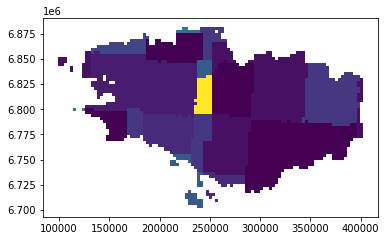

In [2]:
# LOAD DATA AND CREATE GDF
df = pd.read_pickle("/home/simon/CDE_UBS/thesis/data_collection/sen2/closest_dates.pkl")
gdf = gpd.GeoDataFrame(df, geometry=df.geom)
gdf = gdf.set_crs(epsg=2154)
gdf.plot(column="min")

# Try reading only part of image

In [13]:
im_path_sen = '/home/simon/CDE_UBS/thesis/data_collection/small_sen2.tif'
im_path_spot = '/home/simon/CDE_UBS/thesis/data_collection/spot6/ORT_2018_0261_6807_LA93_8Bits.jp2'

In [22]:
def load_window(path,x,y,size):
    import rasterio
    with rasterio.open(path) as src:
        b1 = src.read(1, window=Window(x, y, size, size))
        b2 = src.read(2, window=Window(x, y, size, size))
        b3 = src.read(3, window=Window(x, y, size, size))
        im = np.dstack((b1,b2,b3))
        del b1,b2,b3


    return(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


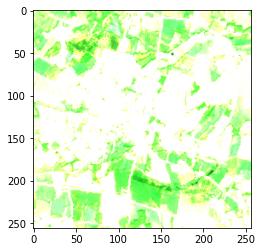

In [23]:
part = load_window(im_path_sen,x=1,y=1,size=256)
print(part.shape)
plt.imshow(part)

(256, 256, 3)


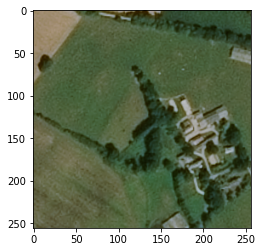

In [24]:
part = load_window(im_path_spot,x=1,y=1,size=256)
print(part.shape)
plt.imshow(part)

In [ ]:
with rasterio.open(
    '/tmp/new.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(Z, 1)

In [169]:
def load_window(path,x,y,size):
    import rasterio, numpy as np
    
    # define rasterio window
    win = Window(x, y, size, size)
    
    # open original
    with rasterio.open(path) as src:
        
        # save meta of original
        src_transform = src.transform
        win_transform = src.window_transform(win)
        aff = win_transform
        
        
        profile = src.profile.copy()
        #aff = src.transform
        
        # extract windowed bands of original
        b1 = src.read(1, window=win)
        b2 = src.read(2, window=win)
        b3 = src.read(3, window=win)
        
        # stack bands to 1 image
        im = np.dstack((b1,b2,b3))
        
        # test show
        plt.imshow(im)
        plt.show()
        print(im.shape)
        
        # reshape to save
        #im = im.reshape(im.shape[2],im.shape[1],im.shape[0])
        #im = np.ascontiguousarray(im.transpose(2,1,0))
        im = im.transpose(1,2,0)
        #im = np.ascontiguousarray(im.reshape(im.shape[2],im.shape[1],im.shape[0]))
        print(im.shape)
        
        
        # define affine transform
        #newaff = rasterio.Affine(aff.a * im, aff.b, aff.c,aff.d, aff.e * im, aff.f)
        profile.update({
            'driver':'GTiff',
            'dtype': 'float32',
            'height': im.shape[1],
            'width': im.shape[2],
            'transform': aff
            })
        
        print(aff)
        
        # save file
        with rasterio.open("test_out.tif", 'w',**profile) as dst:
            dst.write(im)
        
        
        #win_transform = src.window_transform(Window(x, y, size, size))
        #print(win_transform)
        #del b1,b2,b3


    #return(im)

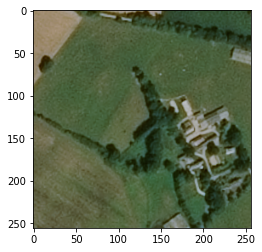

(256, 256, 3)
(256, 3, 256)
| 1.50, 0.00, 261000.00|
| 0.00,-1.50, 6807000.00|
| 0.00, 0.00, 1.00|


ValueError: Source shape (256, 3, 256) is inconsistent with given indexes 3

In [170]:
part = load_window(im_path_spot,x=0,y=0,size=256)

In [69]:
!pwd

/home/simon/CDE_UBS/thesis/data_loader


In [154]:
im_path_spot

'/home/simon/CDE_UBS/thesis/data_collection/spot6/ORT_2018_0261_6807_LA93_8Bits.jp2'